# BloomTech Data Science 

In [ ]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import sys

if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/'
else:
  # If you're working locally:
  DATA_PATH = '..../data/'

# I. Wrangle Data

In [ ]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')

In [ ]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000,2019-01-03
1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0.0,2650000,2019-01-07
2,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000,2019-01-09
3,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006.0,1678000,2019-01-10
4,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0.0,1380000,2019-01-11


In [ ]:
# Wrangle function to Clean up data

def wrangle(filepath):
   # Load the csv file, convert the date column to a datetime object and set it as index.
  df = pd.read_csv(filepath,
                   parse_dates=['SALE_DATE'],
                   index_col=['SALE_DATE'],
                   na_values=[0.0])

  #drop constant columns
  df.drop(columns=['NEIGHBORHOOD','BUILDING_CLASS_CATEGORY'], inplace= True)

  #Drop high-cardinality categorical columns (HCCC's)
  df.drop(columns=['ADDRESS','APARTMENT_NUMBER'], inplace = True)

  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv') 


In [ ]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
# Split into feature matrix X and target vector y

X = df[['GROSS_SQUARE_FEET']]
y = df['SALE_PRICE']



In [ ]:
X.shape, y.shape

((90, 1), (90,))

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
print('Mean sale price:', y.mean() )

Mean sale price: 3928736.3666666667


In [ ]:
y_baseline_pred = [y.mean()] * len(y)

In [ ]:
print('BASELINE MAE', mean_absolute_error(y, y_baseline_pred) )

BASELINE MAE 2783380.1977777784


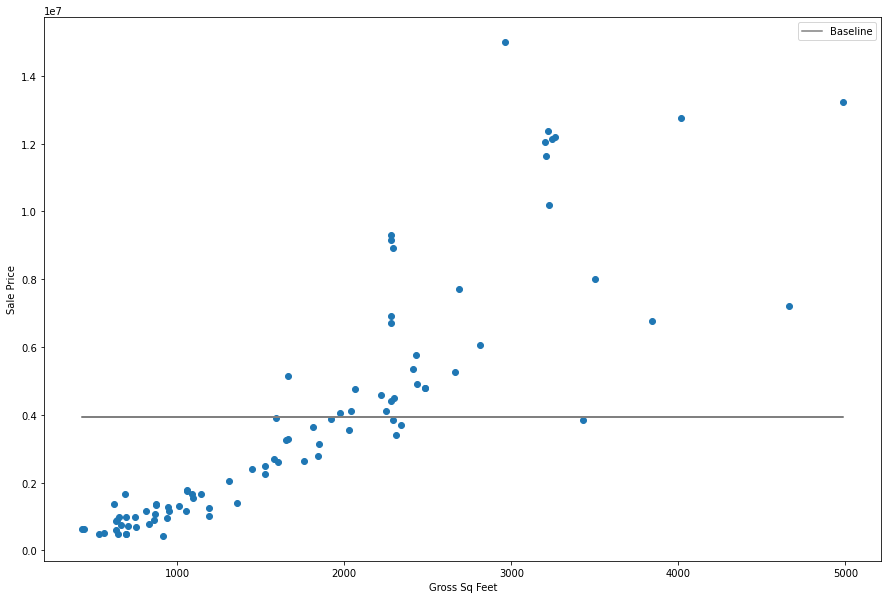

In [ ]:
# # Scatter plot to visualize the baseline
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_baseline_pred, label='Baseline', color='grey')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

# IV. Build Model

In [22]:
# step 1: import predictor class


#step 2:Instantiate my predictor
model_lr = LinearRegression()

# Step 3: fit my model
model_lr.fit(X,y)

# step 4: make predictions
y_pred_lr = model_lr.predict(X)

In [23]:
y_pred_lr

array([ 4155299.64511241,  3906107.38502347,  2155608.66909006,
        1841811.00823732,  1180374.76232224,  5505860.16584135,
         632767.07965766,  2952408.61184358,  5505860.16584135,
        8422332.54317857,  5413566.73617879, 12840111.37636026,
       13833803.96906059,  5988862.44774214,  4401415.45754593,
        -176338.65371754,  4841347.47227085,  8363880.03772561,
        1164992.52404514,  5505860.16584135,  5536624.64239554,
        8391568.06662438,  9262202.75310796,   795818.80539486,
        5905798.36104582,  2155608.66909006,  1758746.92154101,
        1140380.94280179,  7142530.31852426,  3570774.5905828 ,
        3619997.75306951, 10849649.74330416,  5505860.16584135,
       10320500.74657209,  4564467.18328314,   417415.74377833,
        3183142.18600001,  1737211.78795308,  3189295.08131085,
        1186527.65763308,  4186064.1216666 ,  2014092.07694079,
        5545853.9853618 ,  5505860.16584135,  7613226.80980337,
         611231.94606972,  3604615.51479

# V. Check Metrics

In [24]:
#MAE of LinearRegression model
print('Linear Regression MAE', mean_absolute_error(y, y_pred_lr) )

Linear Regression MAE 1176817.9930150746


# VI. Communicate Results

Plot model

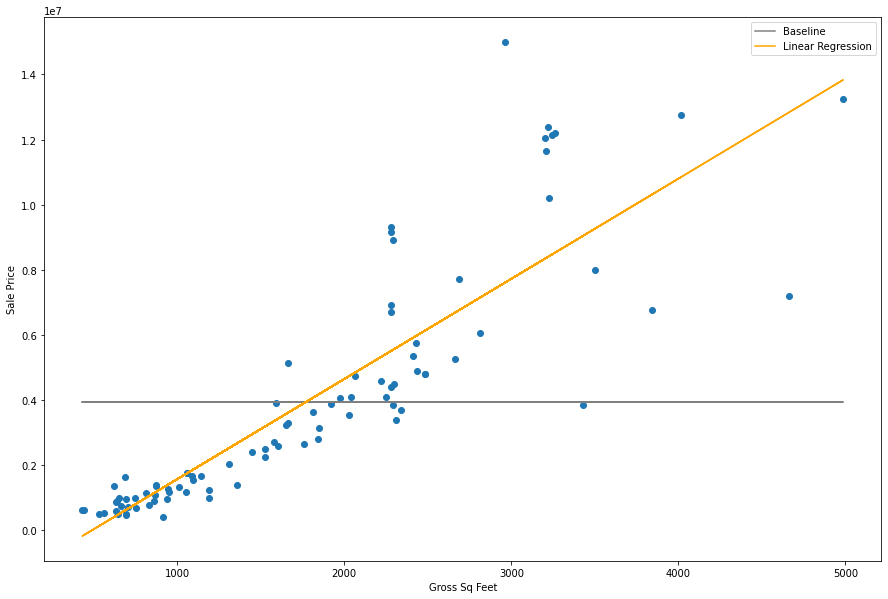

In [25]:
# Plotting baseline and our model to interpret the differences between the two methods.
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_baseline_pred, label='Baseline', color='grey')
plt.plot(X, y_pred_lr, label='Linear Regression', color='orange')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

What are our beta coefficients?

In [26]:
intercept = round(model_lr.intercept_)

In [27]:
coef = round(model_lr.coef_[0])

In [ ]:
# final equation

In [28]:
print(f'SALE_PRICE={intercept} + {coef}*GROSS_SQUARE_FEET')

SALE_PRICE=-1505364 + 3076*GROSS_SQUARE_FEET
